In [1]:
# Importing python libraries
#
import pandas as pd
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set(style = 'darkgrid')
import requests
from io import StringIO
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz 
from IPython.display import Image
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, roc_curve, auc
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
student_data = pd.read_csv('../data/cleaned_students_dataset.csv')


In [3]:
student_data.head()

,school,sex,age,address,family_size,parents_cohabitation_status,mother_education,father_education,mother_job,father_job,...,weekend_alcohol_usage,health,absences,first_period_score,second_period_score,final_score,subject,first_period_grade,second_period_grade,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,6,5,6,6,mathematics,fail,fail,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,4,5,5,6,mathematics,fail,fail,fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,10,7,8,10,mathematics,fail,fail,pass
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,5,2,15,14,15,mathematics,pass,pass,pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,5,4,6,10,10,mathematics,fail,pass,pass


In [4]:
student_data.shape

(1044, 37)

In [5]:
# label encode final_grade
le = preprocessing.LabelEncoder()
student_data.final_grade = le.fit_transform(student_data.final_grade)

In [6]:
# Drop the target columns from the predictive features
X = student_data.drop(labels=['final_grade','final_score'],axis=1)

In [7]:
# set the target variable
y = student_data.final_grade

In [8]:
# get dummy varibles for the predictive features
X = pd.get_dummies(X)


In [9]:
X.head()

,age,mother_education,father_education,commute_time,study_time,failures,family_quality,free_time,go_out_with_friends,weekday_alcohol_usage,...,internet_no,internet_yes,romantic_no,romantic_yes,subject_mathematics,subject_portuguese,first_period_grade_fail,first_period_grade_pass,second_period_grade_fail,second_period_grade_pass
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,1,0,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,0,1,1,0,1,0,1,0,1,0
2,15,1,1,1,2,3,4,3,2,2,...,0,1,1,0,1,0,1,0,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,1,0,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,1,0,1,0,1,0,0,1


In [10]:
X.shape

(1044, 64)

In [11]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: final_grade, dtype: int32

In [12]:
y.shape

(1044,)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 101)

In [14]:
X_train.shape

(730, 64)

In [15]:
X_test.shape

(314, 64)

In [16]:
y_train.shape

(730,)

In [17]:
y_test.shape

(314,)

### Logistic Regression

In [18]:
# define and configure the model
# l1 regularization gives better results
model = LogisticRegression()
# fit the model
model.fit(X_train, y_train)

# evaluate the model
log_preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, log_preds))

print(f'The accuracy score is: {accuracy_score(y_test, log_preds)} and the f1 score is {f1_score(y_test, log_preds)}')
print(f'The recall score is: {recall_score(y_test, log_preds)}')
print('\n')
print(f'{classification_report(y_test, log_preds)}')
matrix = confusion_matrix(y_test, log_preds)
print(matrix)

Accuracy :  0.9044585987261147
The accuracy score is: 0.9044585987261147 and the f1 score is 0.9367088607594937
The recall score is: 0.9652173913043478


              precision    recall  f1-score   support

           0       0.89      0.74      0.81        84
           1       0.91      0.97      0.94       230

    accuracy                           0.90       314
   macro avg       0.90      0.85      0.87       314
weighted avg       0.90      0.90      0.90       314

[[ 62  22]
 [  8 222]]


<AxesSubplot:>

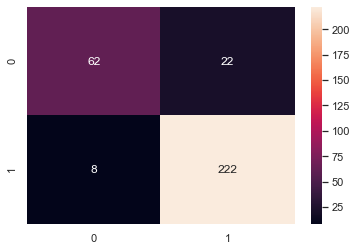

In [19]:
sns.heatmap(matrix,annot = True, fmt = "d")

### Decision Tree Classifier

In [20]:

# define and configure the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X_train, y_train)
# evaluate the model
dc_preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, dc_preds))

print(f'The accuracy score is: {accuracy_score(y_test, dc_preds)} and the f1 score is {f1_score(y_test, dc_preds)}')
print(f'The recall score is: {recall_score(y_test, dc_preds)}')
print('\n')
print(f'{classification_report(y_test, dc_preds)}')
matrix = confusion_matrix(y_test, dc_preds)
print(matrix)

Accuracy :  0.8821656050955414
The accuracy score is: 0.8821656050955414 and the f1 score is 0.9211087420042644
The recall score is: 0.9391304347826087


              precision    recall  f1-score   support

           0       0.81      0.73      0.77        84
           1       0.90      0.94      0.92       230

    accuracy                           0.88       314
   macro avg       0.86      0.83      0.84       314
weighted avg       0.88      0.88      0.88       314

[[ 61  23]
 [ 14 216]]


<AxesSubplot:>

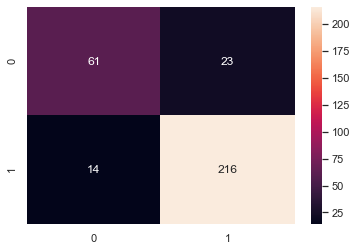

In [21]:
sns.heatmap(matrix,annot = True, fmt = "d")

### Random Forest Classifier

In [22]:
# define and configure the model
model = RandomForestClassifier()

# fit the model
model.fit(X_train, y_train)

# evaluate the model
rf_preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, rf_preds))

print(f'The accuracy score is: {accuracy_score(y_test, rf_preds)} and the f1 score is {f1_score(y_test, rf_preds)}')
print(f'The recall score is: {recall_score(y_test, rf_preds)}')
print('\n')
print(f'{classification_report(y_test, rf_preds)}')
matrix = confusion_matrix(y_test, rf_preds)
print(matrix)

Accuracy :  0.9331210191082803
The accuracy score is: 0.9331210191082803 and the f1 score is 0.9554140127388534
The recall score is: 0.9782608695652174


              precision    recall  f1-score   support

           0       0.93      0.81      0.87        84
           1       0.93      0.98      0.96       230

    accuracy                           0.93       314
   macro avg       0.93      0.89      0.91       314
weighted avg       0.93      0.93      0.93       314

[[ 68  16]
 [  5 225]]


<AxesSubplot:>

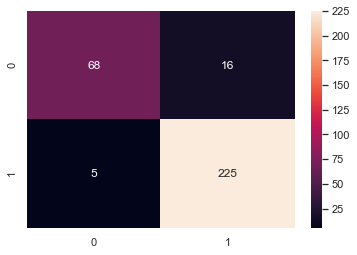

In [23]:
sns.heatmap(matrix,annot = True, fmt = "d")

In [24]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
rf_impo_df = pd.DataFrame({'feature': X.columns, 'importance': np.round(model.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
rf_impo_df

,importance
feature,
second_period_score,0.1779
second_period_grade_fail,0.1153
first_period_score,0.1019
second_period_grade_pass,0.0936
first_period_grade_fail,0.0781
...,...
parents_cohabitation_status_T,0.0018
parents_cohabitation_status_A,0.0017
guardian_other,0.0017


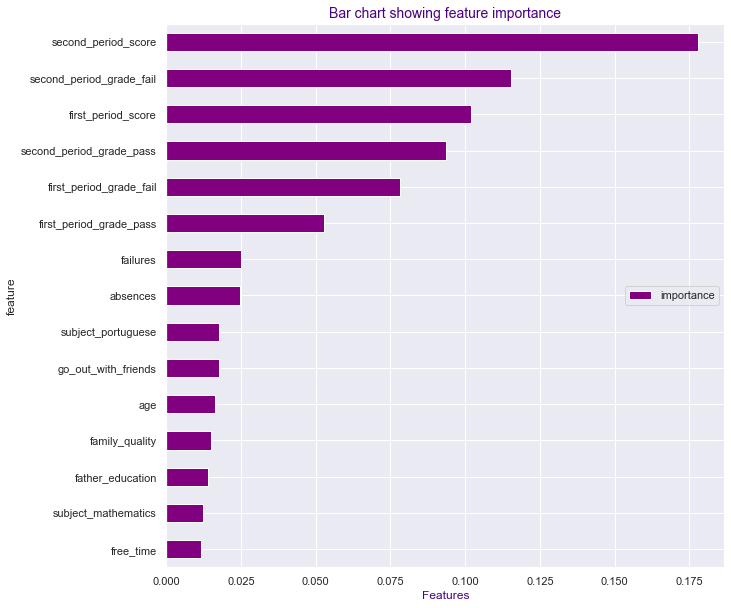

In [25]:
# Creating a bar chart of feature importance in descending order
#
rf_impo_df = rf_impo_df[:15].sort_values(by = 'importance', ascending = True)
rf_impo_df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

### Using the most important features to build a random forest model

In [26]:
rf_impo_df.index

Index(['free_time', 'subject_mathematics', 'father_education',
       'family_quality', 'age', 'go_out_with_friends', 'subject_portuguese',
       'absences', 'failures', 'first_period_grade_pass',
       'first_period_grade_fail', 'second_period_grade_pass',
       'first_period_score', 'second_period_grade_fail',
       'second_period_score'],
      dtype='object', name='feature')

# Data Modelling

## Random Forest Classifier

### Remodelling with the most important features only

In [27]:
# Selecting only important features and the y variable
#
X = X[rf_impo_df.index]

y = y

In [28]:
X.shape, y.shape

((1044, 15), (1044,))

In [29]:
# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# define and configure the model
model = RandomForestClassifier()

# fit the model
model.fit(X_train, y_train)

# evaluate the model
rf_preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, rf_preds))

print(f'The accuracy score is: {accuracy_score(y_test, rf_preds)} and the f1 score is {f1_score(y_test, rf_preds)}')
print(f'The recall score is: {recall_score(y_test, rf_preds)}')
print('\n')
print(f'{classification_report(y_test, rf_preds)}')
matrix = confusion_matrix(y_test, rf_preds)
print(matrix)

Accuracy :  0.9235668789808917
The accuracy score is: 0.9235668789808917 and the f1 score is 0.948936170212766
The recall score is: 0.9695652173913043


              precision    recall  f1-score   support

           0       0.91      0.80      0.85        84
           1       0.93      0.97      0.95       230

    accuracy                           0.92       314
   macro avg       0.92      0.88      0.90       314
weighted avg       0.92      0.92      0.92       314

[[ 67  17]
 [  7 223]]


<AxesSubplot:>

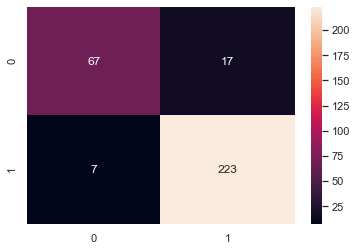

In [30]:
sns.heatmap(matrix,annot = True, fmt = "d")

### Parameter Tuning

In [31]:
# Previewing the parameters to tune
#
RandomForestClassifier()


RandomForestClassifier()

In [32]:
# Creating a dictionary of parameters to tune
#
params = {'n_estimators': [10, 20, 30, 50, 100],
         'max_depth': [1, 2, 3, 4, 5]}

# Setting the number of folds to 10 and instantiating the model
# 
kfold = KFold(n_splits=10, shuffle=True)
model = RandomForestClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# Fitting the grid search with the X and the y variables
#
search.fit(X, y)

# Checking for the best parameters
#
print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'max_depth': 3, 'n_estimators': 100}


In [ ]:
X.shape, y.shape

In [33]:
# Applying the best parameters to the model


# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

## define and configure the model
model = RandomForestClassifier(max_depth = 3, n_estimators = 100)

# fit the model
model.fit(X_train, y_train)

# evaluate the model
rf_preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, rf_preds))

print(f'The accuracy score is: {accuracy_score(y_test, rf_preds)} and the f1 score is {f1_score(y_test, rf_preds)}')
print(f'The recall score is: {recall_score(y_test, rf_preds)}')
print('\n')
print(f'{classification_report(y_test, rf_preds)}')
matrix = confusion_matrix(y_test, rf_preds)
print(matrix)

Accuracy :  0.9235668789808917
The accuracy score is: 0.9235668789808917 and the f1 score is 0.948051948051948
The recall score is: 0.9521739130434783


              precision    recall  f1-score   support

           0       0.87      0.85      0.86        84
           1       0.94      0.95      0.95       230

    accuracy                           0.92       314
   macro avg       0.90      0.90      0.90       314
weighted avg       0.92      0.92      0.92       314

[[ 71  13]
 [ 11 219]]


<AxesSubplot:>

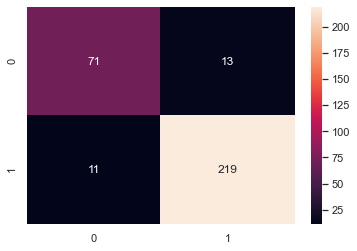

In [34]:
sns.heatmap(matrix,annot = True, fmt = "d")

*Parameter tuning has increased the f1 score*

### Cross Validation to check for the stability of the model

In [35]:
# Performing cross validation of ten folds
#
scores = cross_val_score(model, X, y, scoring = 'f1', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {scores.mean()}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {scores.std()}')

Mean of cross validation scores is 0.94777011696634
Standard deviation of the cross validation scores is 0.012651434579986683


### Plotting ROC Index Curve and comparing AUC

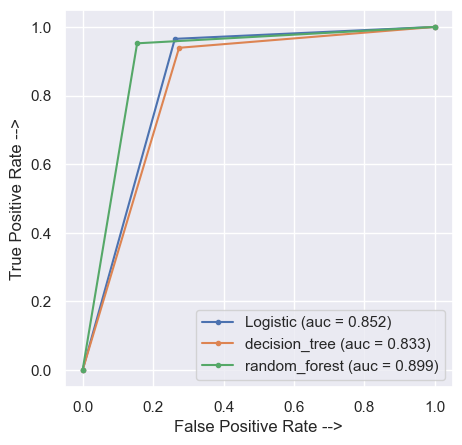

In [36]:
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, log_preds)
auc_logistic = auc(logistic_fpr, logistic_tpr)

decision_tree_fpr, decision_tree_tpr, threshold = roc_curve(y_test, dc_preds)
auc_decision_tree = auc(decision_tree_fpr, decision_tree_tpr)

random_forest_fpr, random_forest_tpr, threshold = roc_curve(y_test, rf_preds)
auc_random_forest = auc(random_forest_fpr, random_forest_tpr)



plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(decision_tree_fpr, decision_tree_tpr, marker='.', label='decision_tree (auc = %0.3f)' % auc_decision_tree)
plt.plot(random_forest_fpr, random_forest_tpr, marker='.', label='random_forest (auc = %0.3f)' % auc_random_forest)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

### From the above chart, Random Forest offers the best RUC and AUC performance